In [1]:
import sys
sys.path.append('../')

In [3]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt

from utils.data import get_loaders, get_default_transforms

In [23]:
train_loader, val_loader, test_loader = get_loaders(
    train_transforms=T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomRotation(45),
            T.ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=0.1),
            T.RandomResizedCrop(224, scale=(0.8, 1.0), interpolation=T.InterpolationMode.BICUBIC),
            T.ToTensor(),
            T.RandomApply([T.RandomChoice([T.ElasticTransform(alpha=20.0, sigma=4.0), T.ElasticTransform(alpha=10.0, sigma=1.0)])], p=0.3),
            T.RandomErasing(p=0.3, scale=(0.02, 0.33), ratio=(1/3, 3), value=0),
            T.RandomErasing(p=0.3, scale=(0.02, 0.33), ratio=(1/3, 3), value='random'),
    ]),
    test_transforms=get_default_transforms('test'),
    train_csv_path='../data/train.csv',
    train_files_dir='../data/train',
    test_csv_path='../data/test.csv',
    test_files_dir='../data/test',
)

In [24]:
for i, (data, target) in enumerate(train_loader):
    print(data.shape)
    print(target)
    break

torch.Size([32, 3, 224, 224])
tensor([1040,  510, 1110,  971, 1065,  176,  813,  878,   40,  128,  491,  631,
         610,  188,  464, 1027,  382,  616,  809,  882,  260,  654,  425,  653,
         566,  516,  476,  994,  702, 1050,  419,  799])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.8791118..4.7961884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.087717..4.266018].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.8928778..4.1759515].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.081052..4.3367143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.048095..3.9147604].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.9012492..4.0460653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.4257393..4

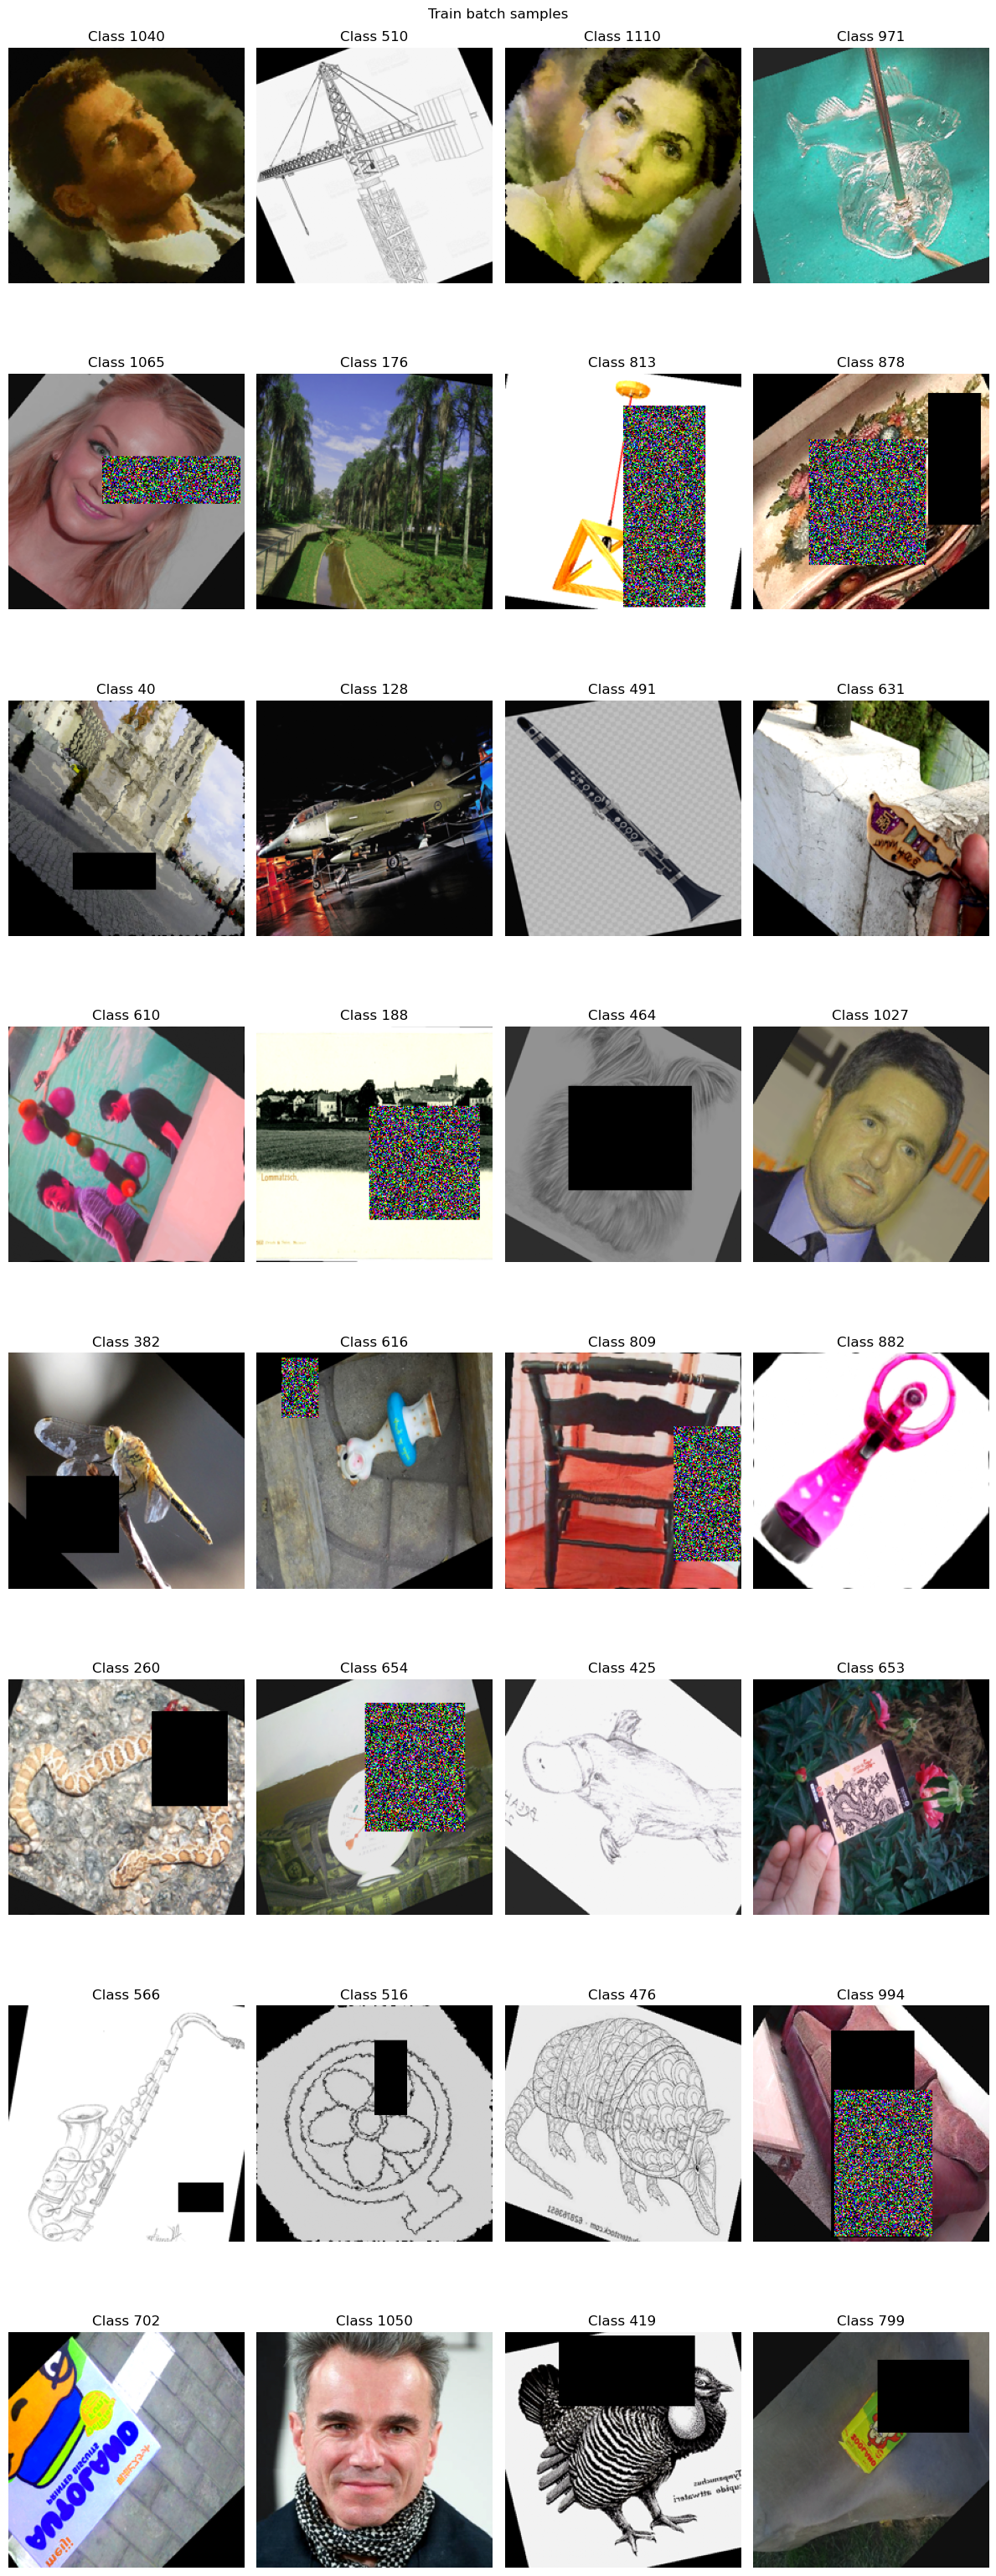

In [25]:
rows_count = len(target) // 4
fig, axs = plt.subplots(rows_count, 4, figsize=(12, rows_count*4))
for i in range(rows_count):
    for j in range(4):
        axs[i, j].imshow(data[i*4+j].permute(1, 2, 0))
        axs[i, j].set_title(f"Class {target[i*4+j].item()}")
        axs[i, j].axis('off')

fig.suptitle('Train batch samples')
fig.tight_layout()
plt.show()